# Stats Testing & Simple Regression with `sales_df`



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlib defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True


import pandas as pd



sales_df = pd.read_csv("sales_data_sample.xls", encoding="cp1252")



display(sales_df.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Hypothesis Testing (one sample T-test)

In [7]:
# Select our data
sales_data = sales_df['SALES']
known_value = 3500

#Hypothesis
# H_0: \MU = 3500
# H_1: \MU != 3500

from scipy import stats 

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sales_data, known_value)

print(f"Sample Mean: {sales_data.mean():.2f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject H0. The average sales is significantly different from $3,500.")
else:
    print("Conclusion: Fail to reject H0. No significant difference from $3,500.")

Sample Mean: 3553.89
t-statistic: 1.5545
p-value: 0.1202
Conclusion: Fail to reject H0. No significant difference from $3,500.


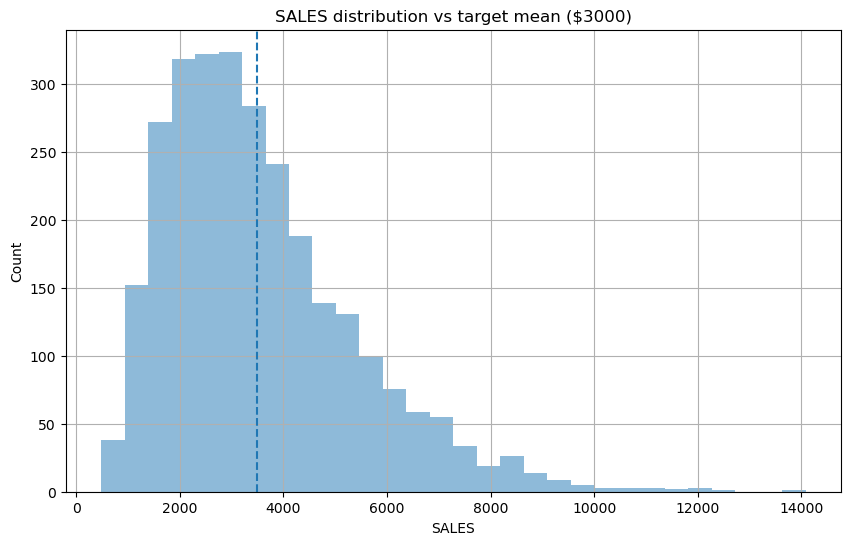

In [8]:
plt.figure()
plt.hist(sales_data, bins=30, alpha=0.5)
plt.axvline(known_value, linestyle='--')
plt.title('SALES distribution vs target mean ($3000)')
plt.xlabel('SALES'); plt.ylabel('Count'); plt.show()

Our sample average ($3,536.94$) is slightly higher than $3,500$, but this difference is not statistically significant. It's likely due to random chance, and we can't conclude our average has truly changed from the $3,500 benchmark.

## 2 Sample T-test

In [18]:
# Select data groups to compare
sales_small_deal = sales_df[sales_df['DEALSIZE'] == 'Small']['SALES']
sales_medium_deal = sales_df[sales_df['DEALSIZE'] == 'Medium']['SALES']

# Perform the two-sample t-test
# We set 'equal_var=False' for Welch's t-test, which is safer as it doesn't assume the two groups have the same variance.
t_statistic, p_value = stats.ttest_ind(sales_small_deal, sales_medium_deal, equal_var=False)



print(f"Mean (Small): {sales_small_deal.mean():.2f}")
print(f"Mean (Medium): {sales_medium_deal.mean():.2f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject H0. There IS a significant difference in sales between Small and Medium deals.")
else:
    print("Conclusion: Fail to reject H0. No significant difference found.")

Mean (Small): 2061.68
Mean (Medium): 4398.43
t-statistic: -72.0432
p-value: 0.0000
Conclusion: Reject H0. There IS a significant difference in sales between Small and Medium deals.


C:\Users\mmray\AppData\Local\Temp\ipykernel_20836\1741802248.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sales_small_deal, sales_medium_deal], labels=["small", "medium"], showmeans=True)


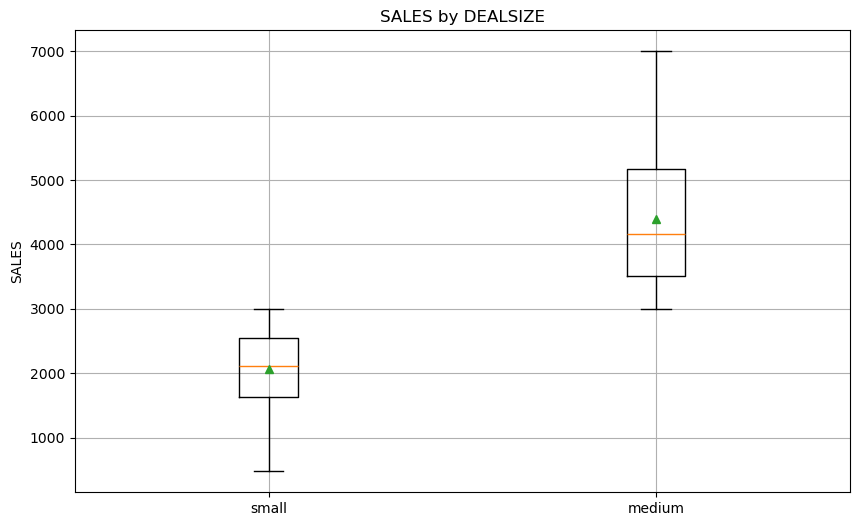

In [19]:
plt.figure()
plt.boxplot([sales_small_deal, sales_medium_deal], labels=["small", "medium"], showmeans=True)
plt.title('SALES by DEALSIZE'); plt.ylabel('SALES'); plt.show()

# ANOVA (comparing multiple groups)

In [9]:
# Find all unique product lines
product_lines = sales_df['PRODUCTLINE'].unique()


group1 = sales_df[sales_df['PRODUCTLINE'] == 'Classic Cars']['SALES']
group2 = sales_df[sales_df['PRODUCTLINE'] == 'Motorcycles']['SALES']
group3 = sales_df[sales_df['PRODUCTLINE'] == 'Trains']['SALES']

# This is simple and works!
F, p = stats.f_oneway(group1, group2, group3)


# use this code if you don't know the groups
# Create a list of sales data for each product line
#samples = []
#for line in product_lines:
    #samples.append(sales_df[sales_df['PRODUCTLINE'] == line]['SALES']) # this creates a list of panda-series
#print(samples,'\n')
# Perform the one-way ANOVA
#f_statistic, p_value = stats.f_oneway(*samples)   # unpack the list of panda series

print(f"F-statistic: {F:.4f}")
print(f"p-value: {p:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject H0. A significant difference exists in average sales between product lines.")
else:
    print("Conclusion: Fail to reject H0. No significant difference found across product lines.")

F-statistic: 17.8614
p-value: 0.0000
Conclusion: Fail to reject H0. No significant difference found across product lines.


C:\Users\mmray\AppData\Local\Temp\ipykernel_20836\480274769.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1,group2,group3], labels=["Class Cars","Motorcycles","Trains"], showmeans=True)


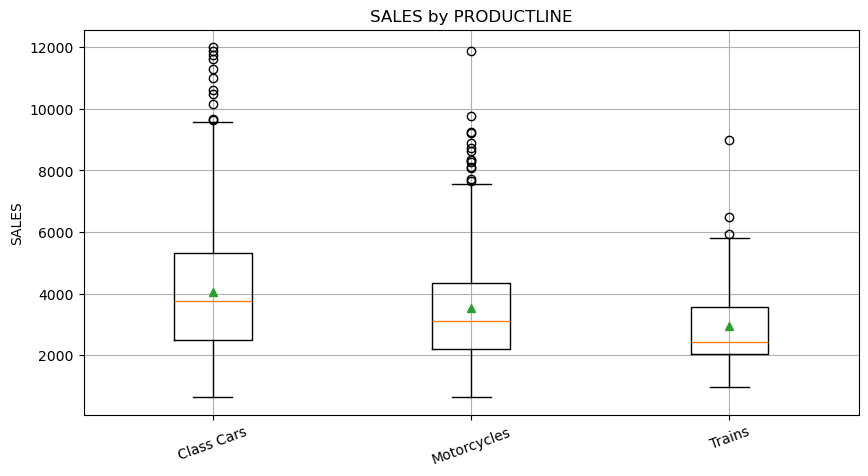

In [24]:
plt.figure(figsize=(10,5))
plt.boxplot([group1,group2,group3], labels=["Class Cars","Motorcycles","Trains"], showmeans=True)
plt.title('SALES by PRODUCTLINE'); plt.ylabel('SALES'); plt.xticks(rotation=20); plt.show()

## Correlation

Correlation Matrix:
                    SALES  QUANTITYORDERED  PRICEEACH      MSRP
SALES            1.000000         0.551426   0.657841  0.635239
QUANTITYORDERED  0.551426         1.000000   0.005564  0.017881
PRICEEACH        0.657841         0.005564   1.000000  0.670625
MSRP             0.635239         0.017881   0.670625  1.000000


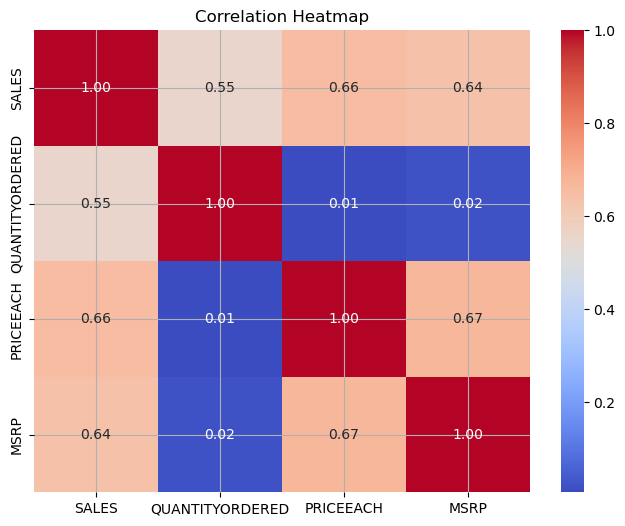

In [22]:
# Select the columns of interest
numeric_cols = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']
corr_matrix = sales_df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualize the matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Regression

In [13]:

import statsmodels.formula.api as smf 

#Human learn from experience 
#Machine learns from data

# Load data from the excel file
df_from_xls = pd.read_csv("advertising_data.xls")

# Fit the Ordinary Least Squares (OLS) model
#column name of the output comes first and followed by the column name of the one you want to use 
model = smf.ols('Sales_k ~ AdvertisingBudget_k', data=df_from_xls).fit()

# Print the model summary
print("\n--- Regression Model Summary ---")
print(model.summary())
print("-" * 30)

# Test (Predict) with a New Value ---
# Let's predict sales for a new budget of $130,000
new_budget_k = 130

# We must create a new DataFrame with the same column name as the model's
# X-variable ('AdvertisingBudget_k')
new_data = pd.DataFrame({
    'AdvertisingBudget_k': [new_budget_k] # Must be a list or array
})

# Use the trained 'model' to 'predict' on the 'new_data'
predicted_sales = model.predict(new_data)

# Print the prediction
print(f"\n--- Prediction for New Value ---")
print(f"Advertising Budget: ${new_budget_k:,.0f}k")
print(f"Predicted Sales:    ${predicted_sales.iloc[0]:,.2f}k")
print("\n(This means a $130,000 budget is predicted to generate ~$1,671,400 in sales)")


--- Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:                Sales_k   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     327.4
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           5.38e-13
Time:                        19:06:29   Log-Likelihood:                -103.14
No. Observations:                  20   AIC:                             210.3
Df Residuals:                      18   BIC:                             212.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
